## Pré-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

#### Importando a biblioteca pandas

In [1]:
import pandas as pd

#### Conjunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

#### Aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [4]:
print(altura)

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]


#### Verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

#### Lendo a base de dados

In [7]:
dataset = pd.read_csv('kc_house_data.csv')

#### Contando o número de pisos

In [8]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

#### Discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [9]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

#### Verificando o novo atributo na última coluna do dataframe

In [11]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


#### Verificando os valores únicos do atributo

In [12]:
dataset['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

Note que há um valor NaN na coluna floors_labels do dataset. Isso se dá devido ao fato de que há um valor NaN na coluna floor, coluna base para a formação dos bins.

In [15]:
dataset[dataset.floors_labels.isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
11,9212900260,20140527T000000,468000.0,2.0,1.0,1160,6000,NaN,0,0,...,860,300,1942,0,98115,47.69,-122.292,1330,6000,NaN


#### Contagem de valores em cada bin ou categoria

In [18]:
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

* Normaliza a escala dos dados interferindo na sua forma, ou seja, mudando sua distribuição

##### Norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### Vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

#### Importando as bibliotecas necessárias.

In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Alguns dados de exemplo

In [21]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### Valor da média

In [22]:
np.mean(data)

4.5625

#### Visualizando a distribuição dos dados

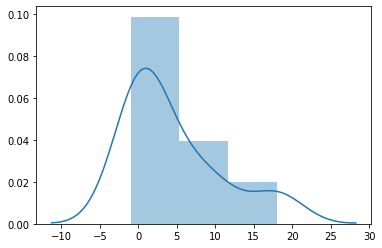

In [23]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

#### Instanciando o objeto normalizer

In [25]:
normalizer = Normalizer().fit(data)

#### Aplicando a normalização nos dados de exemplo utilizando a norma l2

In [26]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [27]:
data2 = data2.reshape(-1)

#### Valor da média

In [28]:
np.mean(data2)

0.4475919008033141

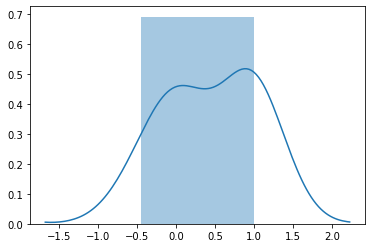

In [29]:
sns.distplot(data2)
plt.show()

### Técnicas de pré-processamento de Dados - Standartization

* Padroniza a escala dos dados sem interferir na sua forma

In [30]:
data = np.random.normal(size = 50)
print(data)

[-1.16468038 -0.06222888  1.19534422 -0.16516508 -2.13072724 -0.55882527
  1.64806787  0.34612841  1.55611168  2.70189569 -0.45756063 -1.00422863
  0.91241003  0.92089257 -0.9984801   0.5184253   0.37765324  0.67919532
  0.05674725 -0.36413915  0.65927902  1.99347715  1.46413975 -0.51325864
  1.20758052  0.75649492  0.5651781  -0.25205511 -0.3290794  -0.25512241
  0.97792484  0.16330363 -0.16795668  2.06708866  0.12129761 -0.66719744
  0.53115507  1.30072852  0.79006286 -1.90765993  0.17107053 -1.0038774
 -1.26445164 -0.247694   -0.02733329  1.71643487 -0.25635574  0.84519685
  1.61777131 -0.30902462]


#### Alterando a forma dos dados para apenas uma dimensão

In [31]:
data = data.reshape(-1,1)

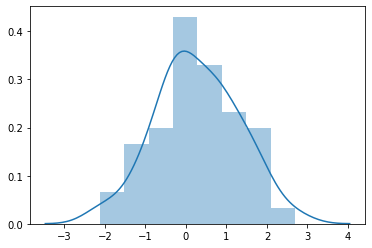

In [32]:
sns.distplot(data)
plt.show()

#### Importando as bibliotecas necessárias.

In [33]:
from sklearn.preprocessing import MinMaxScaler

#### Instanciando o objeto scaler

In [34]:
scaler = MinMaxScaler().fit(data)

#### Transformando os dados com o objeto scaler

In [35]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.19990115]
 [0.42802809]
 [0.68825387]
 [0.40672781]
 [0.        ]
 [0.3252689 ]
 [0.78193461]
 [0.51252823]
 [0.76290639]
 [1.        ]
 [0.34622329]
 [0.23310294]
 [0.62970716]
 [0.63146243]
 [0.23429247]
 [0.5481811 ]
 [0.51905156]
 [0.58144875]
 [0.45264746]
 [0.36555471]
 [0.57732753]
 [0.8534091 ]
 [0.74387492]
 [0.33469787]
 [0.69078589]
 [0.59744412]
 [0.55785551]
 [0.38874792]
 [0.37280952]
 [0.38811322]
 [0.64326394]
 [0.47469685]
 [0.40615016]
 [0.86864131]
 [0.46600467]
 [0.30284378]
 [0.55081523]
 [0.71006073]
 [0.60439023]
 [0.04615864]
 [0.47630403]
 [0.23317562]
 [0.17925578]
 [0.38965036]
 [0.43524893]
 [0.79608158]
 [0.38785801]
 [0.61579894]
 [0.77566543]
 [0.3769594 ]]


#### Alterando a forma dos dados para apenas uma dimensão

In [36]:
data_scaled = data_scaled.reshape(-1,1)

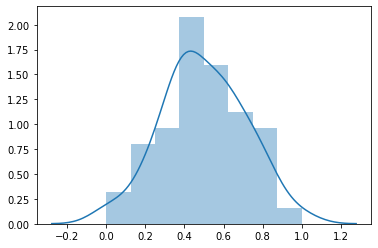

In [37]:
sns.distplot(data_scaled)
plt.show()

### StandardScaler - Técnica de Pré-processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScaler

In [38]:
data = np.random.normal(size = 50)
print(data)

[-0.23321423 -0.54152704 -0.37176108 -0.00985861  0.45990905 -0.76463972
  0.54569791  0.76482642  0.69007881  1.31871046  1.21580897 -0.18488888
  0.57180117 -0.7177581   1.07798146  0.30453806  0.53066694 -0.05727189
  0.51589402  0.7467616   1.89837675 -1.12582107 -1.2505877  -0.43299179
 -0.99580965 -0.63903947 -0.79940186  1.05365291  0.28649607 -0.58019684
  1.53812426 -0.24233152  0.20874934  2.56764342  0.23425442  1.04610107
 -1.01627807 -0.49364822 -1.07492253 -0.83479867 -0.48182595 -1.4560814
 -0.93451476 -0.6422168  -1.37505005  1.25765365 -0.48791696  0.09680394
  0.23418744  1.01959583]


#### Alterando a forma dos dados para apenas uma dimensão

In [39]:
data = data.reshape(-1,1)

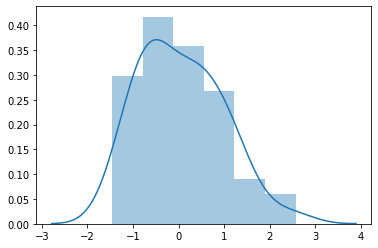

In [40]:
sns.distplot(data)
plt.show()

#### Importando as bibliotecas necessárias.

In [41]:
from sklearn.preprocessing import StandardScaler

#### Instanciando o objeto scaler

In [42]:
scaler = StandardScaler().fit(data)

#### Transformando os dados com o objeto scaler

In [43]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[-0.31157967]
 [-0.65221592]
 [-0.46465174]
 [-0.0648075 ]
 [ 0.45421048]
 [-0.89871968]
 [ 0.54899342]
 [ 0.79109531]
 [ 0.70851118]
 [ 1.40304843]
 [ 1.28935877]
 [-0.2581879 ]
 [ 0.57783335]
 [-0.84692301]
 [ 1.13708146]
 [ 0.28255044]
 [ 0.53238662]
 [-0.11719158]
 [ 0.51606491]
 [ 0.77113658]
 [ 2.04348679]
 [-1.2977672 ]
 [-1.43561433]
 [-0.53230186]
 [-1.15412541]
 [-0.75995154]
 [-0.93712628]
 [ 1.1102023 ]
 [ 0.26261692]
 [-0.69493986]
 [ 1.64546551]
 [-0.32165282]
 [ 0.17671925]
 [ 2.78291922]
 [ 0.20489828]
 [ 1.10185873]
 [-1.17673974]
 [-0.5993175 ]
 [-1.24153247]
 [-0.97623408]
 [-0.58625579]
 [-1.66265194]
 [-1.08640438]
 [-0.76346197]
 [-1.57312528]
 [ 1.33559043]
 [-0.59298538]
 [ 0.05303752]
 [ 0.20482427]
 [ 1.07257469]]


#### Alterando a forma dos dados para apenas uma dimensão

In [44]:
data_scaled = data_scaled.reshape(-1,1)

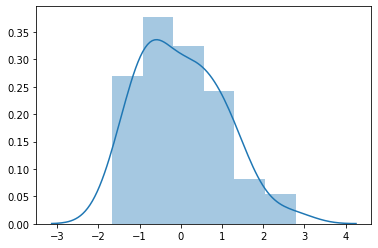

In [45]:
sns.distplot(data_scaled)
plt.show()